# Standings Test
First we establish a valid oauth token below:

In [ ]:
from yahoo_oauth import OAuth2
oauth = OAuth2(None, None, from_file='../oauth2.json')

This will run more frequently - this will check if the token is valid, if not, refresh. Then, we can try to download info from yahoo.

[2019-08-29 22:27:19,142 DEBUG] [yahoo_oauth.yahoo_oauth.token_is_valid] ELAPSED TIME : 2473.5699093341827
[2019-08-29 22:27:19,147 DEBUG] [yahoo_oauth.yahoo_oauth.token_is_valid] TOKEN IS STILL VALID


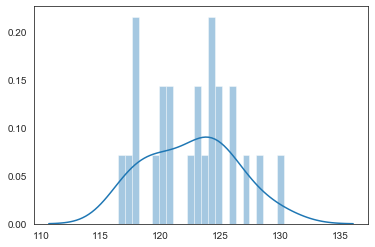

In [26]:
from bs4 import BeautifulSoup
import xml.etree.ElementTree as et 
import pandas as pd 

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

sns.set_style("white")


if not oauth.token_is_valid():
    oauth.refresh_access_token()
    
df_cols = ["projected points"]
out_df = pd.DataFrame(columns = df_cols)

num_teams = 8

league_ids = [1118202, 1110495, 1112355]

dist_series = pd.Series()

for league_id in league_ids:
    url = "https://fantasysports.yahooapis.com/fantasy/v2/league/nfl.l."+str(league_id)+"/scoreboard"
    # url = "https://fantasysports.yahooapis.com/fantasy/v2/league/nfl.l.1118202/standings"
    # probably migrate to scoreboard when there is data... but unsure
    # url = "https://fantasysports.yahooapis.com/fantasy/v2/league/nfl.l.854917/scoreboard"
    payload = ""
    response = oauth.session.get(url, params=payload)

    # we only want to process data if there's data to pass.
    if not response.status_code == 200:
        print("Status Code Not Valid")
        print(response.text)
    else:

    #   XML Samples which are searchable can be found here: https://developer.yahoo.com/fantasysports/guide/

        soup = BeautifulSoup(response.text, 'lxml')
    #     Remove new line formatting from html to prevent confusion
        clean = str(soup).replace('\n', '')
    #     print(clean)
    #     print(soup.prettify())

    #  Get team Names:
    #     select all name tags beneath team tags
        s_team_names = soup.select('team_projected_points total')
    #     extract the text from the entire tag
        s_team_names = list(map(lambda x: float(x.text), s_team_names))
#         print(s_team_names)
    #     place that in a fancy little pandas series
        dist_series = dist_series.append(pd.Series(s_team_names), ignore_index=True)
#         print(dist_series)
        
#     out_df['owner name'] = s_nickname
#     out_df['wins'] = s_wins
#     out_df['losses'] = s_losses
    
sns.distplot(dist_series,bins=24);